In [1]:
pip install unrar

Note: you may need to restart the kernel to use updated packages.


In [2]:
from unrar import rarfile

In [3]:
file=rarfile.RarFile('CC_EDTH_02_Customer Churn.rar')
file.extractall('src')#src indicates the path to decompress

In [4]:
file.namelist()

['Problem Statement.pdf', 'Customer Churn Data.xlsx']

In [5]:
file.printdir()

File Name                                             Modified             Size
Problem Statement.pdf                          2020-12-03 10:12:06       488835
Customer Churn Data.xlsx                       2020-12-03 10:12:06      1050467


In [6]:
file.extractall()

In [7]:
pip install PyPDF2==1.26.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
import PyPDF2

In [9]:
# creating a pdf file object
pdfFileObj = open('Problem Statement.pdf', 'rb')

In [10]:
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

In [11]:
# printing number of pages in pdf file
print(pdfReader.numPages)

2


In [12]:
# creating a page object
pageObj = pdfReader.getPage(0)

In [13]:
# extracting text from page
print(pageObj.extractText())

 
Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.
 
 
 
Business Objective
 
A
n
 
E Commerce
 
company
 
or DTH 
(you can choose either of these two domains) 
provider
 
is 
facing a lot of co
mpetition in the current market and it has 
become a challenge to retain the 
existing customers in the current situation. Hence
, the
 
company wants to develop
 
a
 
model 
through which they can do churn prediction of the accounts and provide segmented offers to the 
potential churners. In this company
,
 
account c
hurn is a major thing because 1 account can have 
multiple customers. hence by losing one account 
the 
company 
might be 
losing more than one 
customer.
 
You have been assign
ed
 
to develop 
a 
churn predicti
on
 
model for this company and provide 
business recommendation
s
 
on the c
ampaign.
 
Your campaign suggestion should be unique and be very clear on the campaign offer because 
your recommendation will go through 

In [14]:
# closing the pdf file object
pdfFileObj.close()

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [17]:
data = pd.read_excel('Customer Churn Data.xlsx',sheet_name = 'Data for DSBA')
data.head(5)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [18]:
data.tail(5)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [19]:
data.shape

(11260, 19)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [21]:
data.drop(['AccountID'], axis = 1, inplace = True)

In [22]:
data.shape

(11260, 18)

In [23]:
data.dtypes

Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [24]:
data.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [25]:
data.Account_user_count.unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [26]:
data.rev_per_month.unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [27]:
data.rev_growth_yoy.unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [28]:
data.coupon_used_for_payment.unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [29]:
data.Day_Since_CC_connect.unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [30]:
data.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [31]:
# a list with all missing value formats

missing_value_formats = ["$","#","*","+", "@","&&&&"]
data = pd.read_excel('Customer Churn Data.xlsx',sheet_name = 'Data for DSBA', na_values = missing_value_formats)

#print rev_growth_yoy 
print(data['rev_growth_yoy'].head(10))

0    11.0
1    15.0
2    14.0
3    23.0
4    11.0
5    22.0
6    14.0
7    16.0
8    14.0
9    12.0
Name: rev_growth_yoy, dtype: float64


In [32]:
print(data['Tenure'].head(10))

0     4.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     2.0
7     0.0
8    13.0
9     0.0
Name: Tenure, dtype: float64


In [33]:
data.rev_growth_yoy.unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [34]:
data.Payment.unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [35]:
data.Gender.unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [36]:
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [37]:
data.Marital_Status.unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [38]:
data.Login_device.unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [39]:
data.Gender.replace(['F', 'M'], ['Female', 'Male'], inplace=True)

In [40]:
data.Gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [41]:
data.account_segment.replace(['Regular +', 'Super +'], ['Regular Plus', 'Super Plus'], inplace=True)

In [42]:
data.account_segment.unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', nan, 'Super Plus'],
      dtype=object)

In [43]:
data.dtypes

AccountID                    int64
Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

In [44]:
data.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [45]:
dupes = data.duplicated()
sum(dupes)

0

In [46]:
data.drop(['AccountID'], axis = 1, inplace = True)

In [47]:
data.shape

(11260, 18)

In [48]:
#Fetch features of type Object
objFeatures = data.select_dtypes(include="object").columns

#Iterate a loop for features of type object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for feat in objFeatures:
    data[feat] = le.fit_transform(data[feat].astype(str))
 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11260 non-null  int32  
 5   Gender                   11260 non-null  int32  
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11260 non-null  int32  
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11260 non-null  int32  
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [49]:
data.dtypes

Churn                        int64
Tenure                     float64
City_Tier                  float64
CC_Contacted_LY            float64
Payment                      int32
Gender                       int32
Service_Score              float64
Account_user_count         float64
account_segment              int32
CC_Agent_Score             float64
Marital_Status               int32
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                 int32
dtype: object

In [50]:
pd.options.display.max_columns = None

In [51]:
data.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,1
1,1,0.0,1.0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1
2,1,0.0,1.0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0.0,3.0,NaN,1
3,1,0.0,3.0,15.0,2,1,2.0,4.0,3,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,1
4,1,0.0,1.0,12.0,1,1,2.0,3.0,2,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,1


In [52]:
data.tail()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,0,10.0,1.0,34.0,1,1,3.0,2.0,3,1.0,1,9.0,0.0,19.0,1.0,4.0,153.71,0
11256,0,13.0,1.0,19.0,1,1,3.0,5.0,0,5.0,1,7.0,0.0,16.0,1.0,8.0,226.91,1
11257,0,1.0,1.0,14.0,2,1,3.0,2.0,3,4.0,1,7.0,1.0,22.0,1.0,4.0,191.42,1
11258,0,23.0,3.0,11.0,1,1,4.0,5.0,3,4.0,1,7.0,0.0,16.0,2.0,9.0,179.90,0
11259,0,8.0,1.0,22.0,1,1,3.0,2.0,3,3.0,1,5.0,0.0,13.0,2.0,3.0,175.04,1


In [53]:
data.shape

(11260, 18)

In [54]:
data.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                      0
Gender                       0
Service_Score               98
Account_user_count         444
account_segment              0
CC_Agent_Score             116
Marital_Status               0
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device                 0
dtype: int64

In [55]:
data = data.replace(np.nan,0)
# count the number of nan values in each column
print(data.isnull().sum())

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64


In [56]:
data.isnull().sum().sum()

0

In [57]:
data.describe()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,0.168384,10.811634,1.637478,17.705240,1.791208,0.614565,2.877265,3.547247,2.194583,3.034902,1.202131,5.915631,0.276288,16.189076,1.790142,4.485879,187.993048,0.799467
std,0.374223,12.844640,0.925130,8.974194,1.056286,0.506044,0.771090,1.233610,1.148711,1.407139,0.703736,11.598273,0.447181,3.766505,1.969505,3.728088,179.244067,0.543449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,11.000000,1.000000,0.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,0.000000,13.000000,1.000000,2.000000,145.080000,0.000000
50%,0.000000,8.000000,1.000000,16.000000,2.000000,1.000000,3.000000,4.000000,2.000000,3.000000,1.000000,4.000000,0.000000,15.000000,1.000000,3.000000,163.170000,1.000000
75%,0.000000,16.000000,3.000000,23.000000,2.000000,1.000000,3.000000,4.000000,3.000000,4.000000,2.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.310000,1.000000
max,1.000000,99.000000,3.000000,132.000000,5.000000,2.000000,5.000000,6.000000,5.000000,5.000000,3.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000,2.000000


In [58]:
data['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

### Exploratory Data Analysis
#### Churn Distribution
##### Below, a Pie Chart and bar chart shows the churn distribution.

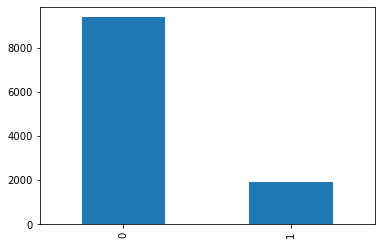

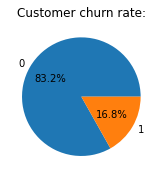

In [59]:
# Plot distribution of dependent/target variable - Churn column
data['Churn'].value_counts().head().plot.bar();   # To generate a bar plot

# To generate a pie chart. Since there are only two classes, a pie chart may look more appealing
sizes = data['Churn'].value_counts(sort = True)
labels = np.unique(data.Churn)

# Visualize the data
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%');

#### Bar & pie plots below show that number of customers churned is less than not churned.

<AxesSubplot:>

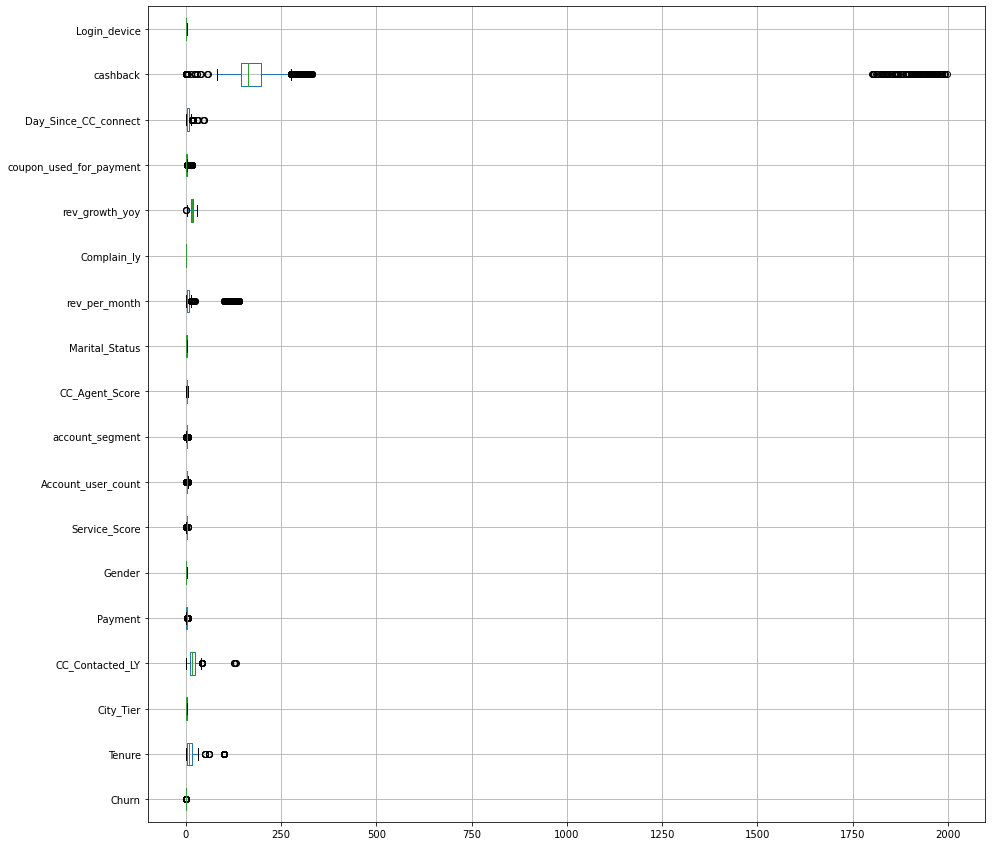

In [60]:
plt.figure(figsize=(15,15))
data.boxplot(vert=0)

Now let us check the distribution of the data.

The X-axis groups the observations from minimum to maximum along the axis on the basis of the discrete points or class intervals

The Y-axis measures the frequency of occurance of observations for each discrete point or class interval.

<AxesSubplot:ylabel='Density'>

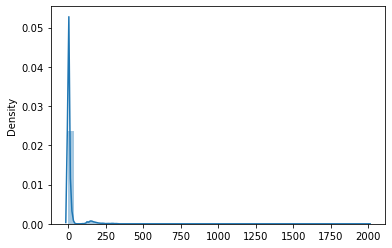

In [61]:
sns.distplot(data) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

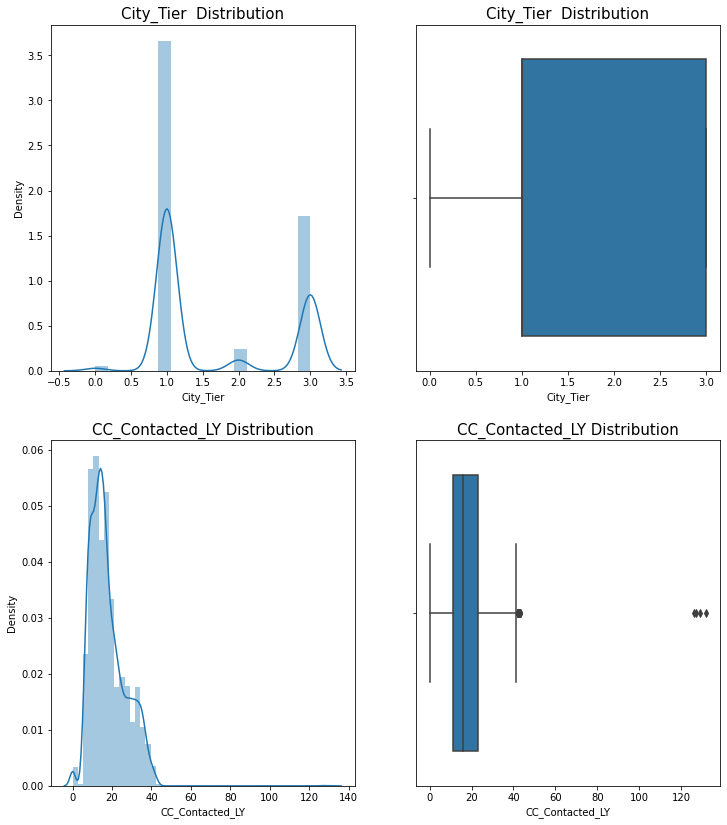

In [62]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data['City_Tier'] , ax=axes[0][0])
a.set_title("City_Tier  Distribution",fontsize=15)

a = sns.boxplot(data['City_Tier'] , orient = "v" , ax=axes[0][1])
a.set_title("City_Tier  Distribution",fontsize=15)

a = sns.distplot(data['CC_Contacted_LY'] , ax=axes[1][0])
a.set_title("CC_Contacted_LY Distribution",fontsize=15)

a = sns.boxplot(data['CC_Contacted_LY'] , orient = "v" , ax=axes[1][1])
a.set_title("CC_Contacted_LY Distribution",fontsize=15)

plt.show()

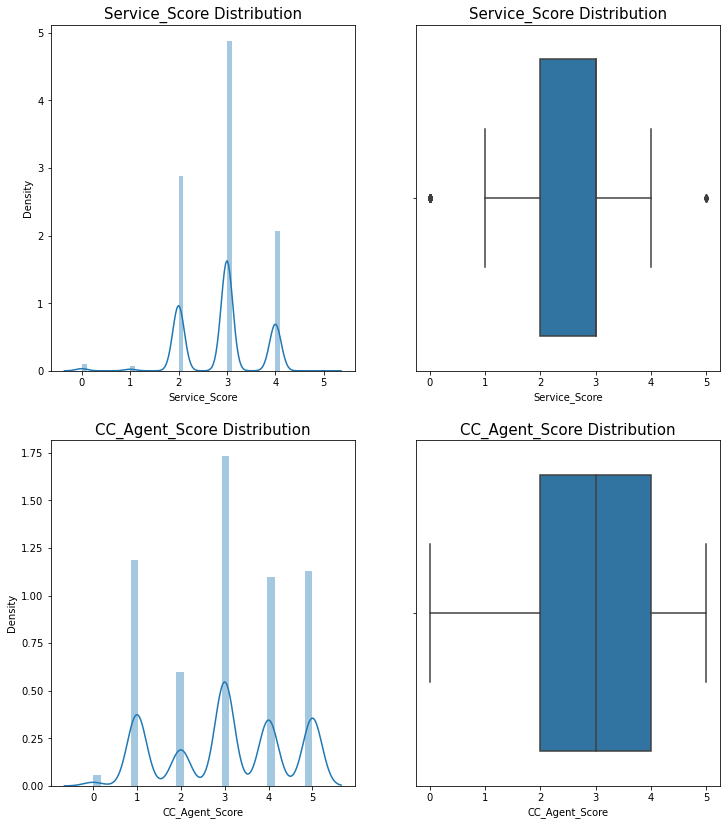

In [63]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(data['Service_Score'] , ax=axes[0][0])
a.set_title("Service_Score Distribution",fontsize=15)

a = sns.boxplot(data['Service_Score'] , orient = "v" , ax=axes[0][1])
a.set_title("Service_Score Distribution",fontsize=15)


a = sns.distplot(data['CC_Agent_Score'] , ax=axes[1][0])
a.set_title("CC_Agent_Score Distribution",fontsize=15)

a = sns.boxplot(data['CC_Agent_Score'] , orient = "v" , ax=axes[1][1])
a.set_title("CC_Agent_Score Distribution",fontsize=15)

plt.show()

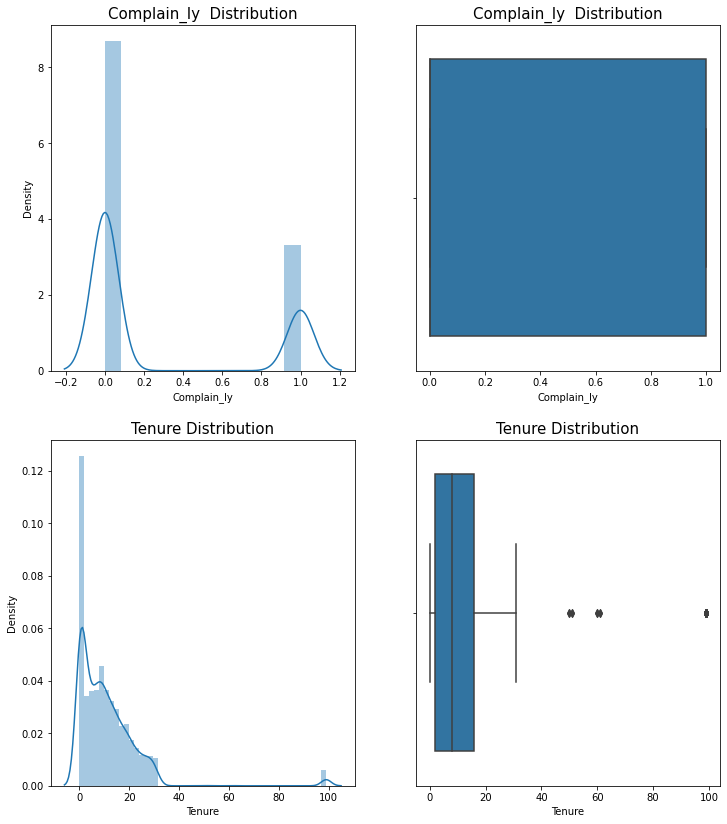

In [64]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data['Complain_ly'] , ax=axes[0][0])
a.set_title("Complain_ly  Distribution",fontsize=15)

a = sns.boxplot(data['Complain_ly'] , orient = "v" , ax=axes[0][1])
a.set_title("Complain_ly  Distribution",fontsize=15)

a = sns.distplot(data['Tenure'] , ax=axes[1][0])
a.set_title("Tenure Distribution",fontsize=15)

a = sns.boxplot(data['Tenure'] , orient = "v" , ax=axes[1][1])
a.set_title("Tenure Distribution",fontsize=15)

plt.show()

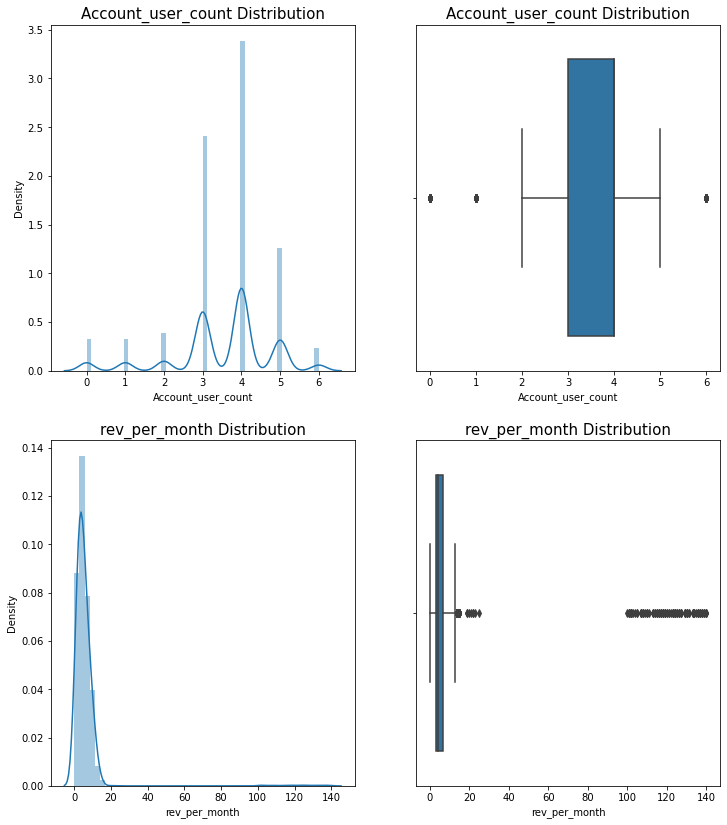

In [65]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data['Account_user_count'] , ax=axes[0][0])
a.set_title("Account_user_count Distribution",fontsize=15)

a = sns.boxplot(data['Account_user_count'] , orient = "v" , ax=axes[0][1])
a.set_title("Account_user_count Distribution",fontsize=15)


a = sns.distplot(data['rev_per_month'] , ax=axes[1][0])
a.set_title("rev_per_month Distribution",fontsize=15)

a = sns.boxplot(data['rev_per_month'] , orient = "v" , ax=axes[1][1])
a.set_title("rev_per_month Distribution",fontsize=15)

plt.show()

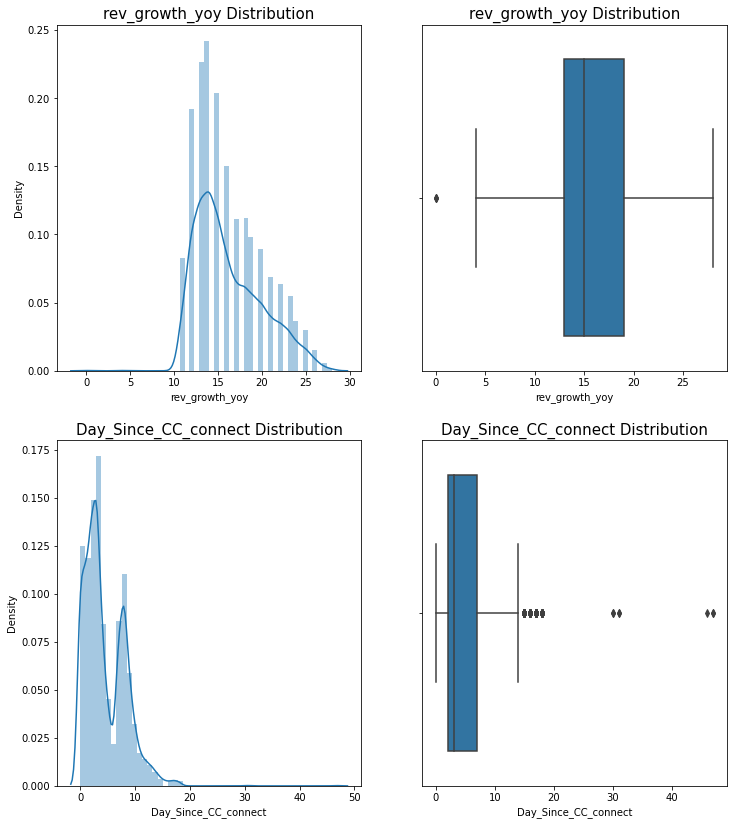

In [66]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data['rev_growth_yoy'] , ax=axes[0][0])
a.set_title("rev_growth_yoy Distribution",fontsize=15)

a = sns.boxplot(data['rev_growth_yoy'] , orient = "v" , ax=axes[0][1])
a.set_title("rev_growth_yoy Distribution",fontsize=15)

a = sns.distplot(data['Day_Since_CC_connect'] , ax=axes[1][0])
a.set_title("Day_Since_CC_connect Distribution",fontsize=15)

a = sns.boxplot(data['Day_Since_CC_connect'] , orient = "v" , ax=axes[1][1])
a.set_title("Day_Since_CC_connect Distribution",fontsize=15)

plt.show()

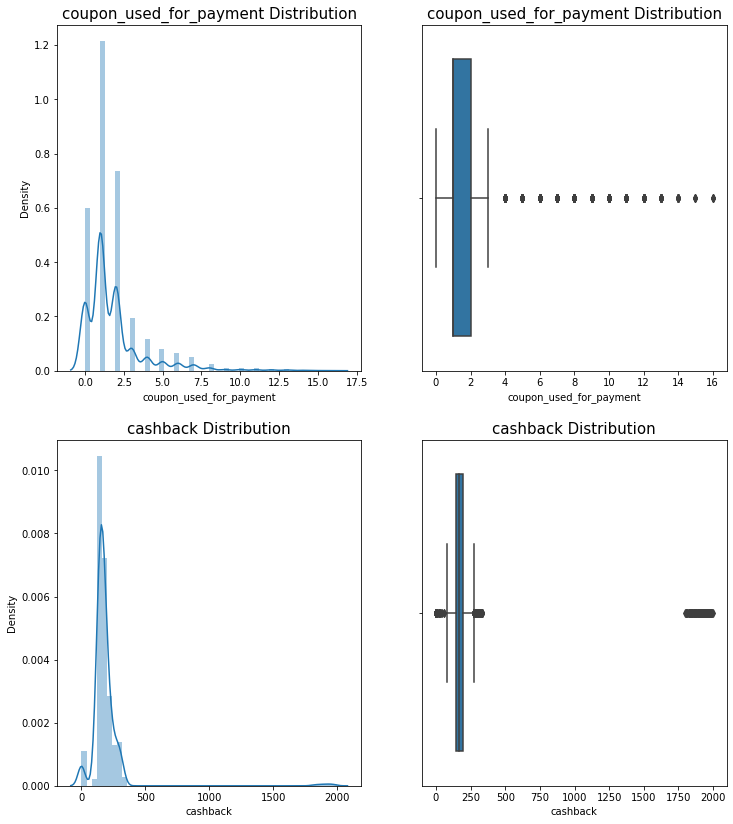

In [67]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(data['coupon_used_for_payment'] , ax=axes[0][0])
a.set_title("coupon_used_for_payment Distribution",fontsize=15)

a = sns.boxplot(data['coupon_used_for_payment'] , orient = "v" , ax=axes[0][1])
a.set_title("coupon_used_for_payment Distribution",fontsize=15)


a = sns.distplot(data['cashback'] , ax=axes[1][0])
a.set_title("cashback Distribution",fontsize=15)

a = sns.boxplot(data['cashback'] , orient = "v" , ax=axes[1][1])
a.set_title("cashback Distribution",fontsize=15)

plt.show()

In [67]:
# Print correlation between all features and target variable
data.corr()['Churn'].sort_values()

Tenure                    -0.231005
Day_Since_CC_connect      -0.143064
account_segment           -0.076226
Login_device              -0.039214
cashback                  -0.032276
coupon_used_for_payment   -0.014715
rev_growth_yoy            -0.013327
Payment                    0.003791
Service_Score              0.008836
rev_per_month              0.023164
Gender                     0.029916
CC_Contacted_LY            0.070054
City_Tier                  0.083209
Account_user_count         0.091853
CC_Agent_Score             0.101340
Marital_Status             0.129425
Complain_ly                0.246350
Churn                      1.000000
Name: Churn, dtype: float64

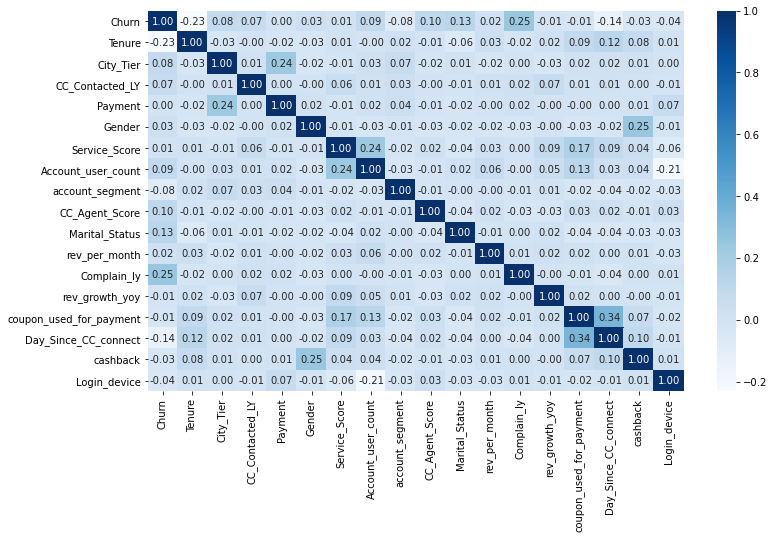

In [68]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

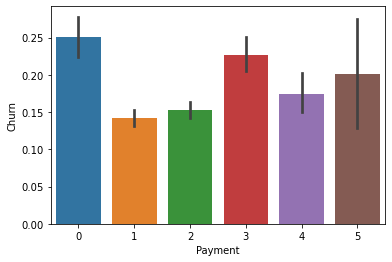

<Figure size 864x504 with 0 Axes>

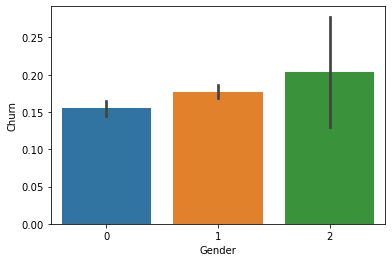

<Figure size 864x504 with 0 Axes>

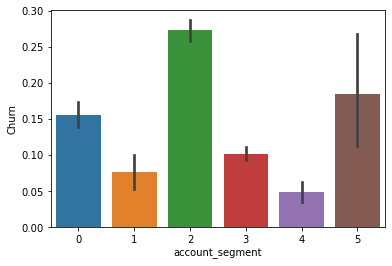

<Figure size 864x504 with 0 Axes>

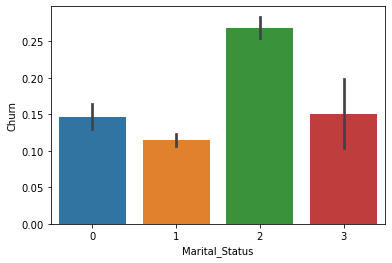

<Figure size 864x504 with 0 Axes>

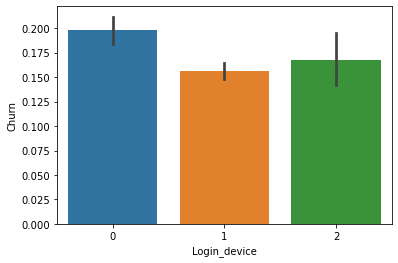

<Figure size 864x504 with 0 Axes>

In [69]:
# For following features, let us generate bar plots w.r.t. target variable

for col in ('Payment', 'Gender', 'account_segment' , 'Marital_Status',
        'Login_device'):
    sns.barplot(x = col, y = 'Churn', data = data)
    plt.figure(figsize=(12,7))
    plt.show()
    
# Following plots show Churn rate for each category of these categorical features.

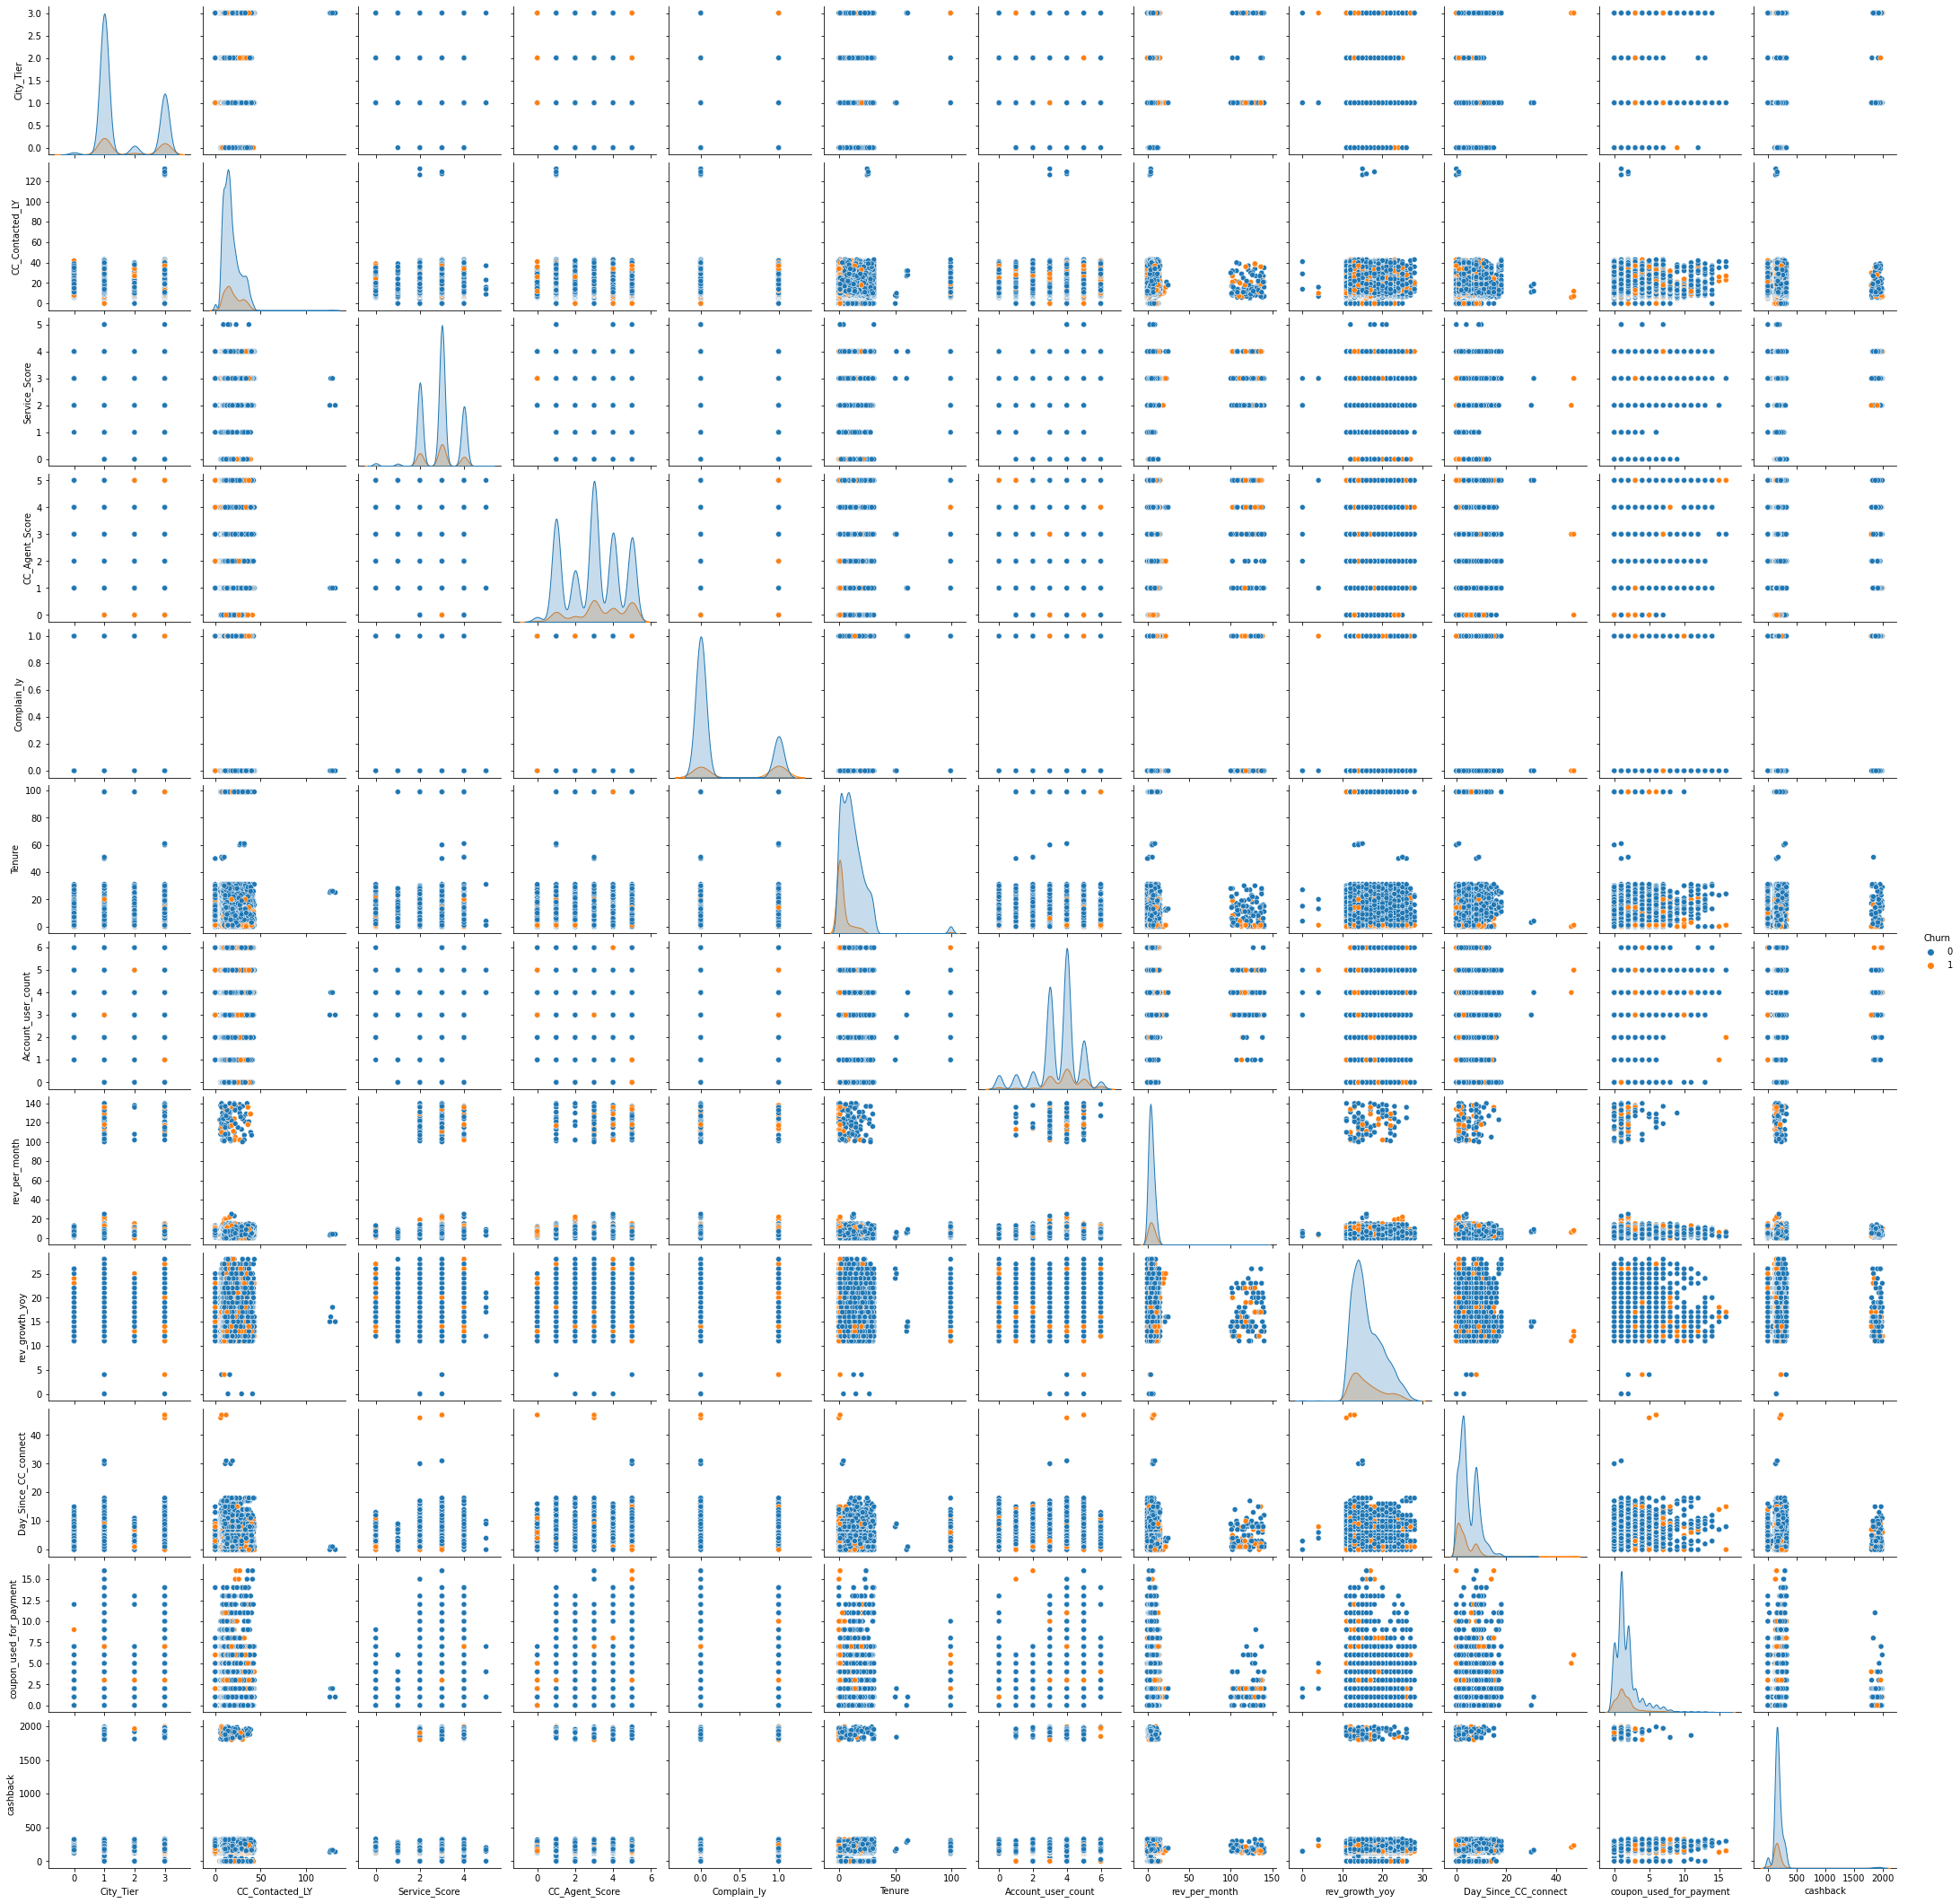

In [70]:
Cols = ['Churn','City_Tier','CC_Contacted_LY','Service_Score','CC_Agent_Score','Complain_ly','Tenure','Account_user_count',     
'rev_per_month','rev_growth_yoy','Day_Since_CC_connect','coupon_used_for_payment','cashback']
sns.pairplot(data[Cols], hue = 'Churn');

In [71]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [72]:
lCC_Contacted_LY,uCC_Contacted_LY=remove_outlier(data['CC_Contacted_LY'])
data['CC_Contacted_LY']=np.where(data['CC_Contacted_LY']>uCC_Contacted_LY,uCC_Contacted_LY,data['CC_Contacted_LY'])
data['CC_Contacted_LY']=np.where(data['CC_Contacted_LY']<lCC_Contacted_LY,lCC_Contacted_LY,data['CC_Contacted_LY'])

lService_Score,uService_Score=remove_outlier(data['Service_Score'])
data['Service_Score']=np.where(data['Service_Score']>uService_Score,uService_Score,data['Service_Score'])
data['Service_Score']=np.where(data['Service_Score']<lService_Score,lService_Score,data['Service_Score'])

lTenure,uTenure=remove_outlier(data['Tenure'])
data['Tenure']=np.where(data['Tenure']>uTenure,uTenure,data['Tenure'])
data['Tenure']=np.where(data['Tenure']<lTenure,lTenure,data['Tenure'])

lAccount_user_count,uAccount_user_count=remove_outlier(data['Account_user_count'])
data['Account_user_count']=np.where(data['Account_user_count']>uAccount_user_count,uAccount_user_count,data['Account_user_count'])
data['Account_user_count']=np.where(data['Account_user_count']<lAccount_user_count,lAccount_user_count,data['Account_user_count'])

lrev_per_month,urev_per_month=remove_outlier(data['rev_per_month'])
data['rev_per_month']=np.where(data['rev_per_month']>urev_per_month,urev_per_month,data['rev_per_month'])
data['rev_per_month']=np.where(data['rev_per_month']<lrev_per_month,lrev_per_month,data['rev_per_month'])

lrev_growth_yoy,urev_growth_yoy=remove_outlier(data['rev_growth_yoy'])
data['rev_growth_yoy']=np.where(data['rev_growth_yoy']>urev_growth_yoy,urev_growth_yoy,data['rev_growth_yoy'])
data['rev_growth_yoy']=np.where(data['rev_growth_yoy']<lrev_growth_yoy,lrev_growth_yoy,data['rev_growth_yoy'])


lDay_Since_CC_connect,uDay_Since_CC_connect=remove_outlier(data['Day_Since_CC_connect'])
data['Day_Since_CC_connect']=np.where(data['Day_Since_CC_connect']>uDay_Since_CC_connect,uDay_Since_CC_connect,data['Day_Since_CC_connect'])
data['Day_Since_CC_connect']=np.where(data['Day_Since_CC_connect']<lDay_Since_CC_connect,lDay_Since_CC_connect,data['Day_Since_CC_connect'])

lcoupon_used_for_payment,ucoupon_used_for_payment=remove_outlier(data['coupon_used_for_payment'])
data['coupon_used_for_payment']=np.where(data['coupon_used_for_payment']>ucoupon_used_for_payment,ucoupon_used_for_payment,data['coupon_used_for_payment'])
data['coupon_used_for_payment']=np.where(data['coupon_used_for_payment']<lcoupon_used_for_payment,lcoupon_used_for_payment,data['coupon_used_for_payment'])

lcashback,ucashback=remove_outlier(data['cashback'])
data['cashback']=np.where(data['cashback']>ucashback,ucashback,data['cashback'])
data['cashback']=np.where(data['cashback']<lcashback,lcashback,data['cashback'])

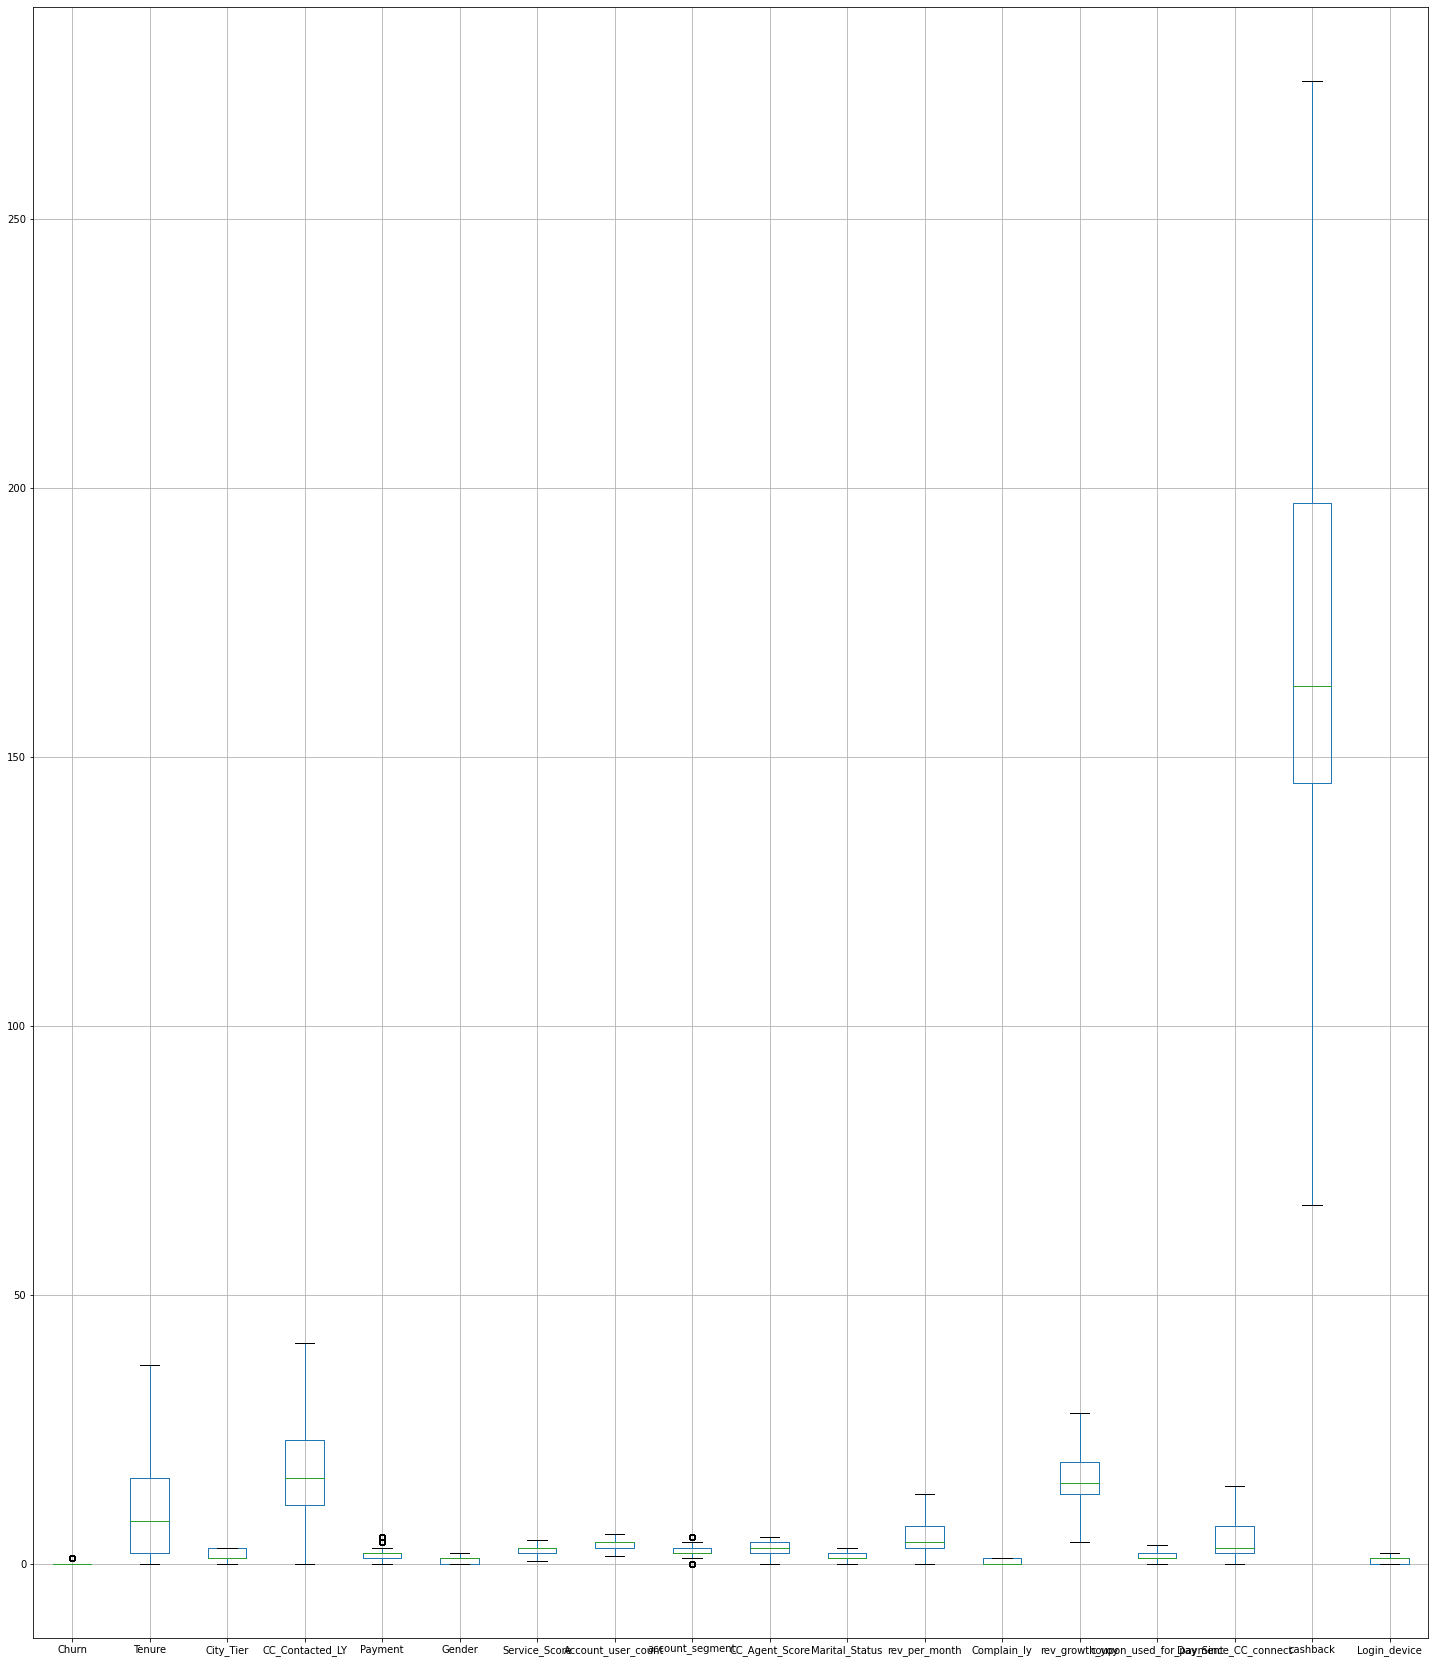

In [73]:
# Checking for outliers after handling them 

plt.subplots(figsize=(25,30))
data.boxplot(figsize=(25,20));

MinMaxScaler normalizes the data using the formula (x - min)/(max - min)

In [74]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

data[['City_Tier','CC_Contacted_LY','Service_Score','CC_Agent_Score','Complain_ly','Tenure','Account_user_count','rev_per_month','rev_growth_yoy','Day_Since_CC_connect','coupon_used_for_payment','cashback']] = mms.fit_transform(data[['City_Tier','CC_Contacted_LY','Service_Score','CC_Agent_Score','Complain_ly','Tenure','Account_user_count','rev_per_month','rev_growth_yoy','Day_Since_CC_connect','coupon_used_for_payment','cashback']])

data

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,0.108108,1.000000,0.146341,2,0,0.625,0.375,3,0.4,2,0.692308,1.0,0.291667,0.285714,0.344828,0.446080,1
1,1,0.000000,0.333333,0.195122,4,1,0.625,0.625,2,0.6,2,0.538462,1.0,0.458333,0.000000,0.000000,0.259262,1
2,1,0.000000,0.333333,0.731707,2,1,0.375,0.625,2,0.6,2,0.461538,1.0,0.416667,0.000000,0.206897,0.000000,1
3,1,0.000000,1.000000,0.365854,2,1,0.375,0.625,3,1.0,2,0.615385,0.0,0.791667,0.000000,0.206897,0.322300,1
4,1,0.000000,0.333333,0.292683,1,1,0.375,0.375,2,1.0,2,0.230769,0.0,0.291667,0.285714,0.206897,0.300905,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0,0.270270,0.333333,0.829268,1,1,0.625,0.125,3,0.2,1,0.692308,0.0,0.625000,0.285714,0.275862,0.416308,0
11256,0,0.351351,0.333333,0.463415,1,1,0.625,0.875,0,1.0,1,0.538462,0.0,0.500000,0.285714,0.551724,0.766681,1
11257,0,0.027027,0.333333,0.341463,2,1,0.625,0.125,3,0.8,1,0.538462,1.0,0.750000,0.285714,0.275862,0.596807,1
11258,0,0.621622,1.000000,0.268293,1,1,0.875,0.875,3,0.8,1,0.538462,0.0,0.500000,0.571429,0.620690,0.541667,0


In [75]:
data.head(5)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,0.108108,1.000000,0.146341,2,0,0.625,0.375,3,0.4,2,0.692308,1.0,0.291667,0.285714,0.344828,0.446080,1
1,1,0.000000,0.333333,0.195122,4,1,0.625,0.625,2,0.6,2,0.538462,1.0,0.458333,0.000000,0.000000,0.259262,1
2,1,0.000000,0.333333,0.731707,2,1,0.375,0.625,2,0.6,2,0.461538,1.0,0.416667,0.000000,0.206897,0.000000,1
3,1,0.000000,1.000000,0.365854,2,1,0.375,0.625,3,1.0,2,0.615385,0.0,0.791667,0.000000,0.206897,0.322300,1
4,1,0.000000,0.333333,0.292683,1,1,0.375,0.375,2,1.0,2,0.230769,0.0,0.291667,0.285714,0.206897,0.300905,1


In [76]:
# Create K Means cluster and store the result in the object k_means
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 2,random_state=1)

In [77]:
# Creating Clusters using KMeans
### Forming 2 Clusters with K=2


In [79]:
# Fit K means on the scaled_df
k_means.fit(data)

KMeans(n_clusters=2, random_state=1)

In [80]:
### Cluster Output for all the observations

In [81]:
# Get the labels
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
### Within Cluster Sum of Squares

In [83]:
k_means.inertia_

40244.16049492927

In [84]:
### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [85]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(data)
k_means.inertia_

50683.96596321364

In [86]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(data)
k_means.inertia_

33770.95210403609

In [87]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(data)
k_means.inertia_

30699.886684956935

In [88]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(data)
k_means.inertia_

28793.341489503797

In [89]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(data)
k_means.inertia_

27400.185304021506

WSS reduces as K keeps increasing

In [99]:
### Calculating Within Cluster Sum of Squares for other values of K - Elbow Method

In [91]:
wss =[] 

In [92]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(data)
    wss.append(KM.inertia_)

In [93]:
wss

[50683.96596321364,
 40244.16049492927,
 33770.95210403609,
 30699.886684956935,
 28793.341489503793,
 27400.185304021506,
 25985.47087757477,
 25358.51447364453,
 24530.35855896802,
 23746.803848831267]

In [94]:
a=[1,2,3,4,5,6,7,8,9,10]

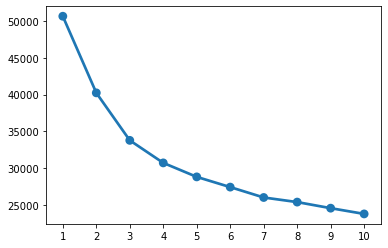

In [95]:
sns.pointplot(a, wss);

In [97]:
# KMeans with K=3

In [98]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(data)
labels = k_means.labels_

In [100]:
### Cluster evaluation for 3 clusters: the silhouette score

In [101]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [102]:
# Calculating silhouette_score
silhouette_score(data,labels,random_state=1)

0.22540715127430286

In [103]:
# KMeans with K=4

In [104]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(data)
labels = k_means.labels_

In [105]:
### Cluster evaluation for 4 clusters

In [106]:
silhouette_score(data,labels,random_state=1)

0.15297562970088974

silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

In [107]:
#Appending Clusters to the original dataset

In [108]:
data["Clus_kmeans3"] = labels
data.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Clus_kmeans3
0,1,0.108108,1.000000,0.146341,2,0,0.625,0.375,3,0.4,2,0.692308,1.0,0.291667,0.285714,0.344828,0.446080,1,1
1,1,0.000000,0.333333,0.195122,4,1,0.625,0.625,2,0.6,2,0.538462,1.0,0.458333,0.000000,0.000000,0.259262,1,0
2,1,0.000000,0.333333,0.731707,2,1,0.375,0.625,2,0.6,2,0.461538,1.0,0.416667,0.000000,0.206897,0.000000,1,3
3,1,0.000000,1.000000,0.365854,2,1,0.375,0.625,3,1.0,2,0.615385,0.0,0.791667,0.000000,0.206897,0.322300,1,1
4,1,0.000000,0.333333,0.292683,1,1,0.375,0.375,2,1.0,2,0.230769,0.0,0.291667,0.285714,0.206897,0.300905,1,3


In [109]:
#Cluster profiles for kmeans Cluster

In [110]:
data.Clus_kmeans3.value_counts().sort_index()

0    1750
1    3820
2    2054
3    3636
Name: Clus_kmeans3, dtype: int64

In [111]:
clust_profile=data
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=data.Clus_kmeans3.value_counts().sort_index()
clust_profile

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,freq
Clus_kmeans3,,,,,,,,,,,,,,,,,,,
0,0.206857,0.246610,0.764000,0.439805,3.544571,0.637143,0.589786,0.535286,2.709143,0.616114,1.174286,0.376440,0.300000,0.504095,0.412735,0.289852,0.489780,0.885714,1750
1,0.082723,0.318183,0.555061,0.445033,1.448953,0.592670,0.589463,0.519404,3.221466,0.599791,1.179058,0.398047,0.259162,0.508519,0.436799,0.348357,0.550150,0.749476,3820
2,0.138754,0.374957,0.571568,0.426663,1.745862,0.600779,0.598040,0.550511,0.207887,0.617819,1.150925,0.396974,0.280915,0.502150,0.511476,0.426149,0.732133,0.812561,2054
3,0.256601,0.178642,0.416575,0.414399,1.332508,0.634488,0.602963,0.520971,1.990374,0.604015,1.268702,0.343531,0.280253,0.512399,0.358636,0.204364,0.355008,0.803080,3636


In [112]:
data.to_csv('km.csv')